In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import accuracy_score, mean_squared_error
from joblib import dump


In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

- `Pregnancies`. Number of pregnancies of the patient (numeric)
- `Glucose`. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- `BloodPressure`. Diastolic blood pressure (measured in mm Hg) (numeric)
- `SkinThickness`. Triceps skinfold thickness (measured in mm) (numeric)
- `Insulin`. 2-hour serum insulin (measured in mu U/ml) (numeric)
- `BMI`. Body mass index (numeric)
- `DiabetesPedigreeFunction`. Diabetes Pedigree Function (numeric)
- `Age`. Age of patient (numeric)
- `Outcome`. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [31]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [32]:
nan_summary = df.isna().sum()

print("Summary of NaN values:")
print(nan_summary)

Summary of NaN values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [33]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)


In [34]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Univariate Analysis

Percentage of missing values for Pregnancies: 0.00%
The coefficient of variation for Pregnancies is 87.63%


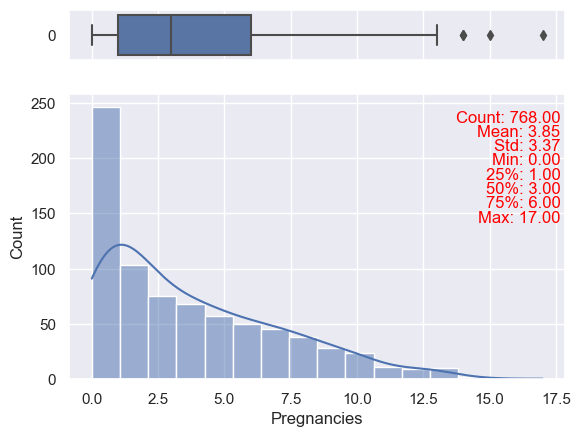

Percentage of missing values for Glucose: 0.65%
The coefficient of variation for Glucose is 25.09%


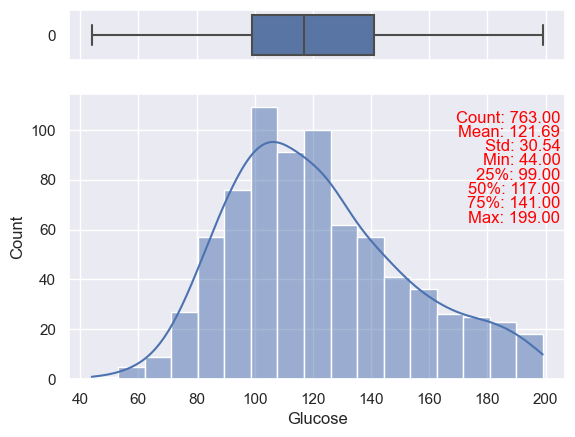

Percentage of missing values for BloodPressure: 4.56%
The coefficient of variation for BloodPressure is 17.10%


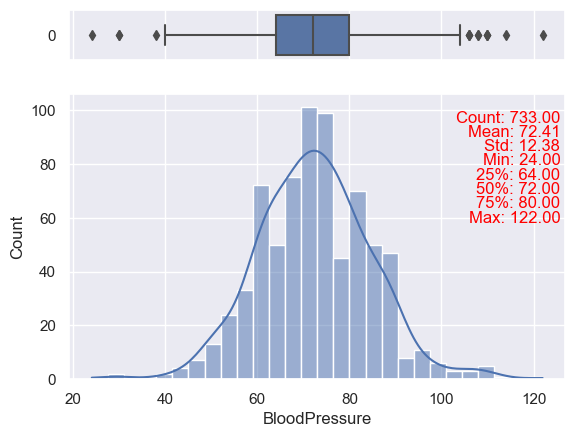

Percentage of missing values for SkinThickness: 29.56%
The coefficient of variation for SkinThickness is 35.94%


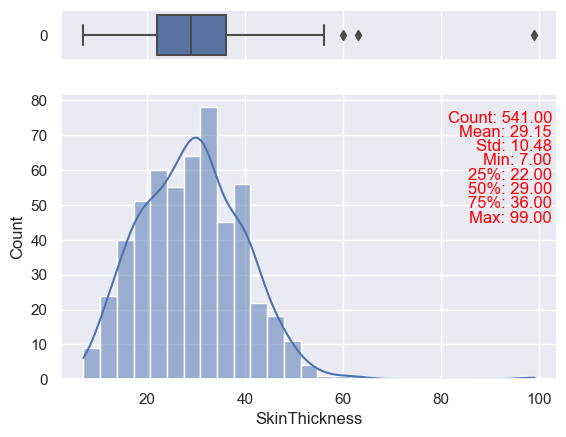

Percentage of missing values for Insulin: 48.70%
The coefficient of variation for Insulin is 76.36%


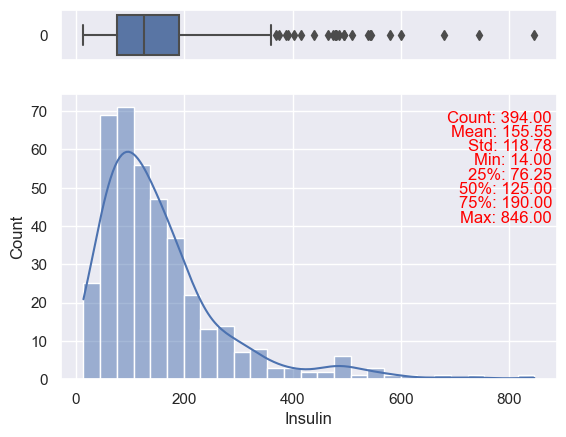

Percentage of missing values for BMI: 1.43%
The coefficient of variation for BMI is 21.34%


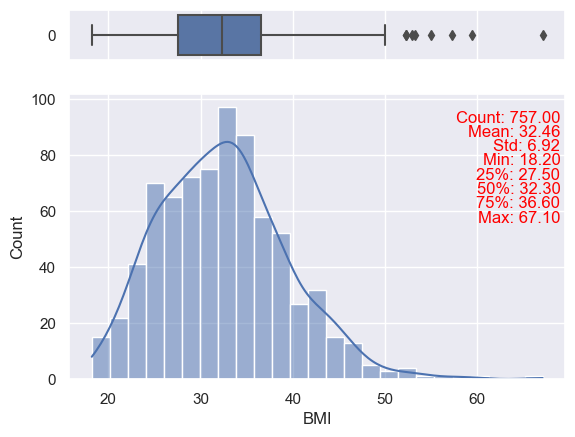

Percentage of missing values for DiabetesPedigreeFunction: 0.00%
The coefficient of variation for DiabetesPedigreeFunction is 70.22%


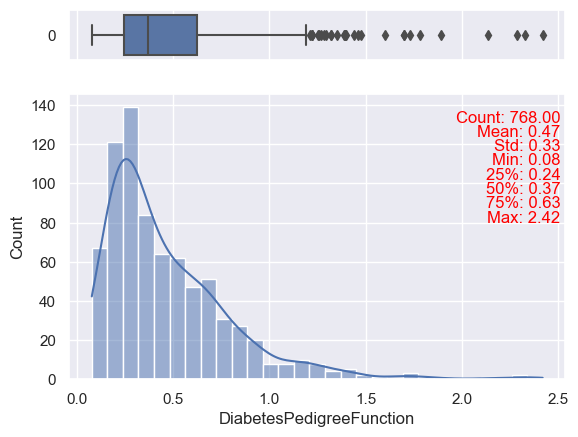

Percentage of missing values for Age: 0.00%
The coefficient of variation for Age is 35.38%


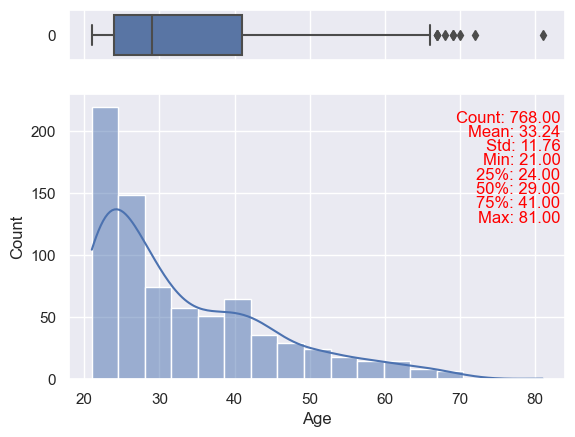

Percentage of missing values for Outcome: 0.00%
The coefficient of variation for Outcome is 136.68%


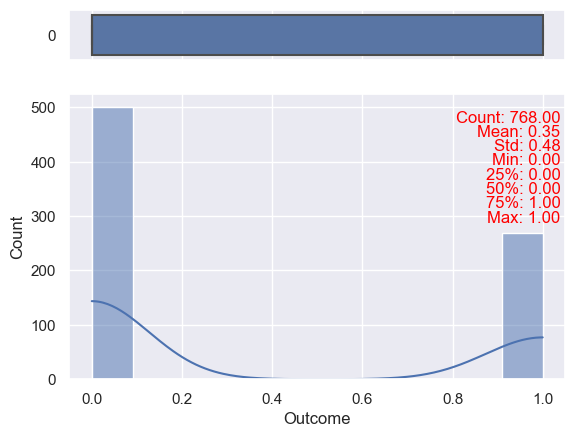

In [35]:
def plot_box_hist(data, columns_to_plot):
    sns.set(style="darkgrid")

    for col in columns_to_plot:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

        sns.boxplot(data[col], orient="h", ax=ax_box)
        sns.histplot(data=data, x=col, ax=ax_hist, kde=True) 

        stats = data[col].describe()

        for stat_name, stat_value in stats.items():
            ax_hist.text(0.99, 0.9 - 0.05 * stats.index.get_loc(stat_name), f"{stat_name.capitalize()}: {stat_value:.2f}", transform=ax_hist.transAxes, ha='right', color='red')

        ax_box.set(xlabel='')

        # Print percentage of missing values
        missing_percentage = (data[col].isnull().sum() / len(data)) * 100
        print(f"Percentage of missing values for {col}: {missing_percentage:.2f}%")

        # Coefficient of Variation
        cv = 100 * data[col].std() / data[col].mean()
        print(f"The coefficient of variation for {col} is {cv:.2f}%")

        plt.show()

num_cols = df.select_dtypes(include=np.number).columns.tolist()

columns_to_plot = num_cols

plot_box_hist(df, columns_to_plot)


- Target variable is imbalanced where 34% is positive and 65% is negative
- `Pregnancies`, `Glucose`, `SkinThickness`, `Insulin`, `DiabetesPedigreeFunction`,`Age`, are all right skewed
- `BloodPressure` has 35 0 values, `SkinThickness` has 227 0 values, `Insulin` has 374 0 values


In [154]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

zero_percentage = (df.eq(0).sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Zero Percentage': zero_percentage
})

print(missing_values_df)


                          Missing Percentage  Zero Percentage
Pregnancies                              0.0        14.453125
Glucose                                  0.0         0.651042
BloodPressure                            0.0         4.557292
SkinThickness                            0.0        29.557292
Insulin                                  0.0        48.697917
BMI                                      0.0         1.432292
DiabetesPedigreeFunction                 0.0         0.000000
Age                                      0.0         0.000000
Outcome                                  0.0        65.104167


In [155]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [156]:
# bins = [-1, 0, 30, 80, 127, float('inf')] 
# labels = ['No_Insulin', 'Tier1_Insulin', 'Tier2_Insulin', 'Tier3_Insulin', 'Tier4_Insulin']

# df['Insulin_Category'] = pd.cut(df['Insulin'], bins=bins, labels=labels, right=False)


### Transformations

In [20]:
df['log_pregnancies'] = np.log(df['Pregnancies']+0.001)
df['log_glucose'] = np.log(df['Glucose']+0.001)
df['log_skinthickness'] = np.log(df['SkinThickness']+0.001)
df['log_insulin'] = np.log(df['Insulin']+0.001)
df['log_DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
df['log_age'] = np.log(df['Age'])


In [162]:
# X_cat = df.select_dtypes(include=['category'])
# X_num = df.select_dtypes(include=['number']).drop(['Outcome'], axis=1)

In [163]:
# encoder = OneHotEncoder(max_categories=5,sparse_output=False, drop='first')
# encoder.fit(X_cat)
# X_dummies = encoder.transform(X_cat)

In [164]:
# X = np.c_[X_num,X_dummies]
# y = df["Outcome"].values

In [37]:
## Main goal: predict
y = df["Outcome"].values
X = df.select_dtypes(include=['number']).drop(['Outcome'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

In [8]:
# import joblib
# # Save the data
# joblib.dump((X_train, X_test, y_train, y_test), 'C:/Users/Rashid/Documents/my_projects/4geeks/Decision_tree-NIDDKD/data/processed/train_test_split_data.joblib')

['C:/Users/Rashid/Documents/my_projects/4geeks/Decision_tree-NIDDKD/data/processed/train_test_split_data.joblib']

In [62]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini = dt_gini.fit(X_train, y_train)

In [63]:
y_pred = dt_gini.predict(X_test)
y_pred_train = dt_gini.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))
print(f"mean squared error-in: {mean_squared_error(y_train, y_pred_train)}")
print(f"mean squared error-out: {mean_squared_error(y_test, y_pred)}")


0.8762214983713354
0.7207792207792207
mean squared error-in: 0.1237785016286645
mean squared error-out: 0.2792207792207792


In [64]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy = dt_entropy.fit(X_train, y_train)

In [65]:
y_pred = dt_entropy.predict(X_test)
y_pred_train = dt_entropy.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))
print(f"mean squared error-in: {mean_squared_error(y_train, y_pred_train)}")
print(f"mean squared error-out: {mean_squared_error(y_test, y_pred)}")

0.9201954397394136
0.6753246753246753
mean squared error-in: 0.07980456026058631
mean squared error-out: 0.3246753246753247


In [7]:
# plt.figure(figsize=(15, 7.5))
# plot_tree(dt,
#            filled=True,
#            rounded=True,
#            class_names=["neg diabetes", "Positive diabetes"],
#            feature_names=X.columns);

In [8]:
# y_pred = dt.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
# disp.plot(cmap='Blues', values_format='d')

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

In [68]:
grid1 = GridSearchCV(dt,
                    param_grid=param_dict,
                    cv=5
                    )
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [70]:
grid1.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [71]:
dt_grid = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=10)
dt_grid  = dt_grid.fit(X_train, y_train)

In [72]:
y_pred = dt_grid.predict(X_test)
y_pred_train = dt_grid.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))
print(f"mean squared error-in: {mean_squared_error(y_train, y_pred_train)}")
print(f"mean squared error-out: {mean_squared_error(y_test, y_pred)}")

0.8534201954397395
0.7402597402597403
mean squared error-in: 0.1465798045602606
mean squared error-out: 0.2597402597402597


In [76]:
dump(dt_grid, open("dt_grid.sav", "wb"))